## IR1

### Create an original graph

Text(0.5, 1.0, 'Sonar2')

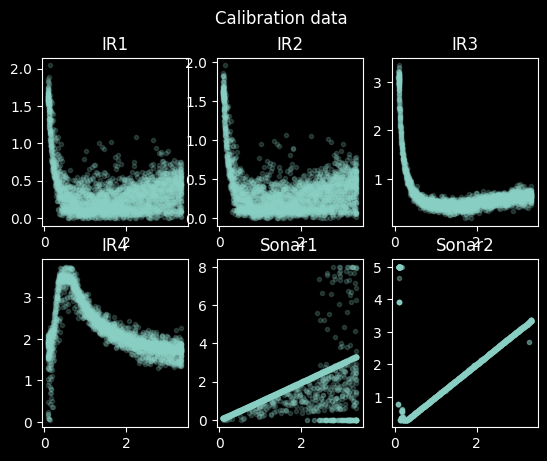

In [1]:
from numpy import loadtxt
from matplotlib.pyplot import subplots, show

# Load data
filename = 'partA/calibration.csv'
data = loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, distance, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, \
    sonar1, sonar2 = data.T


fig, axes = subplots(2, 3)
fig.suptitle('Calibration data')

axes[0, 0].plot(distance, raw_ir1, '.', alpha=0.2)
axes[0, 0].set_title('IR1')

axes[0, 1].plot(distance, raw_ir2, '.', alpha=0.2)
axes[0, 1].set_title('IR2')

axes[0, 2].plot(distance, raw_ir3, '.', alpha=0.2)
axes[0, 2].set_title('IR3')

axes[1, 0].plot(distance, raw_ir4, '.', alpha=0.2)
axes[1, 0].set_title('IR4')

axes[1, 1].plot(distance, sonar1, '.', alpha=0.2)
axes[1, 1].set_title('Sonar1')

axes[1, 2].plot(distance, sonar2, '.', alpha=0.2)
axes[1, 2].set_title('Sonar2')


## Error function


In [2]:
def square_error(index, data_voltage, sim_voltage):
    total_error = 0
    for i in range(index):
        total_error = total_error + (data_voltage[i] - sim_voltage[i]) **2
    return total_error
        

## model

96.89001630534105


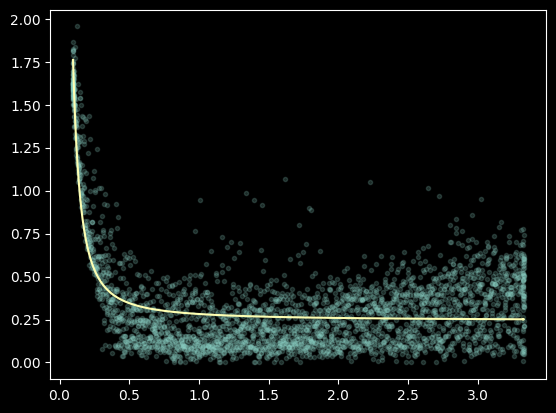

In [3]:
import scipy as sp

def ir2_model(x,a,b,c):
    return a/x/x + b/x + c

ir2_params, cov = sp.optimize.curve_fit(ir2_model,distance,raw_ir2)
ir2_fit = ir2_model(distance, *ir2_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir2,'.',alpha=0.2)
ax.plot(distance,ir2_fit)

# the error: 
error_ir2 = square_error(len(ir2_fit),ir2_fit,raw_ir2)
print(error_ir2)

### Polynomial

16.675493669552978


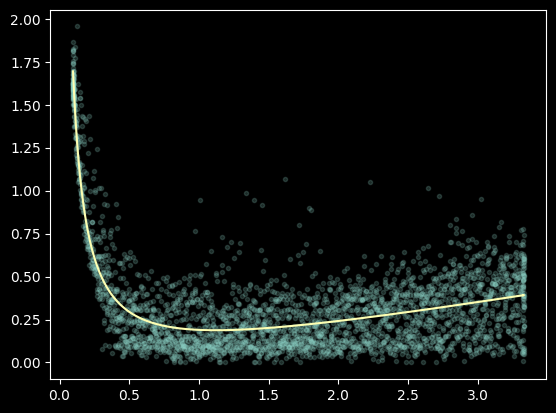

In [4]:
import scipy as sp

def ir2_polynomial_model(x,a,b,c):
    return a/x*2 + b*x +c

# def ir1_model(x,a,b):
#     return a/x + b

# ir1_params, cov = sp.optimize.curve_fit(ir1_model,distance,raw_ir1)
# ir1_fit = ir1_model(distance, *ir1_params)

ir2_polynomial_params, cov = sp.optimize.curve_fit(ir2_polynomial_model,distance,raw_ir2)
ir2_polynomial_fit = ir2_polynomial_model(distance, *ir2_polynomial_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir2,'.',alpha=0.2)
ax.plot(distance,ir2_polynomial_fit)
# ax.plot(distance,ir1_fit )

# ****************************************************************
# the error: 
error_ir2_polynomial = square_error(len(ir2_fit),ir2_fit,ir2_polynomial_fit)
print(error_ir2_polynomial)

## Piecewise Function

In [5]:
import scipy as sp
import numpy as np

Error_Array = []

for AA in distance:
    def ir2_piecewise_model(x, a1, b1, a2, b2):
        Xb =  AA
        res = np.zeros_like(x)
        res[x < Xb] = a1 / x[x < Xb] + b1
        res[x >= Xb] = a2 * x[x >= Xb] + b2
        return res
    ir2_params, cov = sp.optimize.curve_fit(ir2_piecewise_model,distance,raw_ir2)
    ir2_fit_pw = ir2_piecewise_model(distance, *ir2_params)
    Error_Array.append(square_error(len(raw_ir2),raw_ir2,ir2_fit_pw))


# ****************************************************************
# the error: 
# Error_Array.append(square_error(len(ir1_fit),ir1_fit,ir1_fit_pw))

# print(Error_Array)
print(len(Error_Array))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


3023


In [6]:
print(min(Error_Array))

min_Error = min(Error_Array)
min_index = Error_Array.index(min_Error)
min_distance = distance[min_index]
print(min_index)
print(distance[min_index])

77.28618167701723
833
0.8850688966647664


In [7]:
# print(Error_Array)


77.28618167701723


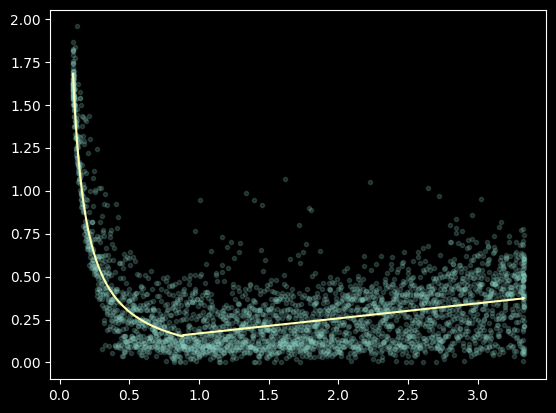

In [8]:
import scipy as sp

def ir2_piecewise_model(x,a1,b1,a2,b2):
    Xb =  min_distance
    res = np.zeros_like(x)
    res[x < Xb] = a1 / x[x < Xb] + b1
    res[x >= Xb] = a2 * x[x >= Xb] + b2
    
    return res

ir2_params, cov = sp.optimize.curve_fit(ir2_piecewise_model,distance,raw_ir2)
ir2_fit_pw = ir2_piecewise_model(distance, *ir2_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir2,'.',alpha=0.2)
ax.plot(distance,ir2_fit_pw)

# ****************************************************************
# the error: 
error_ir2_pw = square_error(len(raw_ir2),raw_ir2,ir2_fit_pw)
print(error_ir2_pw)


Text(0.5, 1.0, 'IR4_ Error')

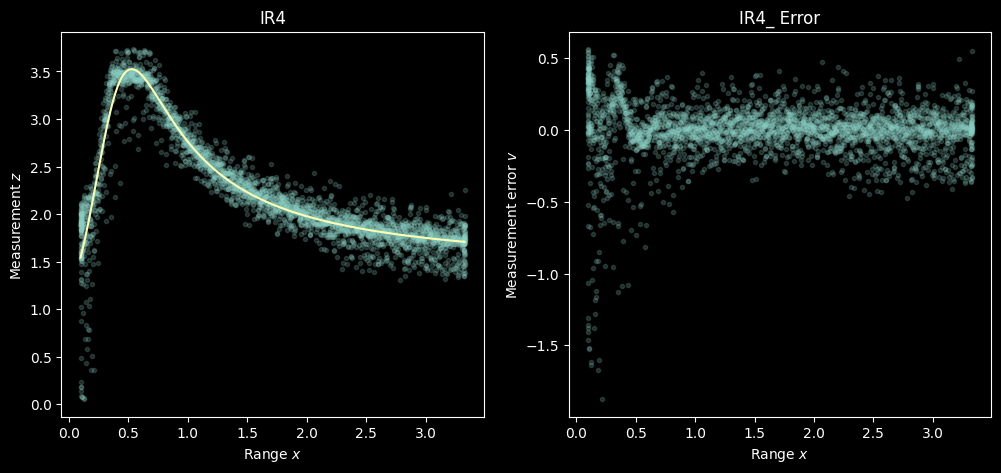

In [9]:

import scipy as sp

def ir4_polynomial_model(x,a1,b1,a2,b2,c1,c2,d):
    return (a1*x**2 + b1*2 + c1) / (a2*x**2 + b2*x + c2) + d

ir4_polynomial_params, cov = sp.optimize.curve_fit(ir4_polynomial_model,distance,raw_ir4)
ir4_polynomial_fit = ir4_polynomial_model(distance, *ir4_polynomial_params)

fig,ax = subplots(1,2,figsize=(12, 5))
ax[0].plot(distance,raw_ir4,'.',alpha=0.2)
ax[0].plot(distance,ir4_polynomial_fit)
ax[0].set_title('IR4')
ax[0].set_xlabel(r"Range $x$")
ax[0].set_ylabel(r"Measurement $z$")
# ax.plot(distance,ir1_fit )

# the ERROR for Polynomial
residual_ir4_polynomial = raw_ir4 - ir4_polynomial_fit
# fig,ax = subplots(1)
ax[1].plot(distance,residual_ir4_polynomial,'.',alpha=0.2)
# Add labels with LaTeX-style notation
ax[1].set_xlabel(r"Range $x$")
ax[1].set_ylabel(r"Measurement error $ v$")
ax[1].set_title('IR4_ Error')


<Figure size 640x480 with 0 Axes>

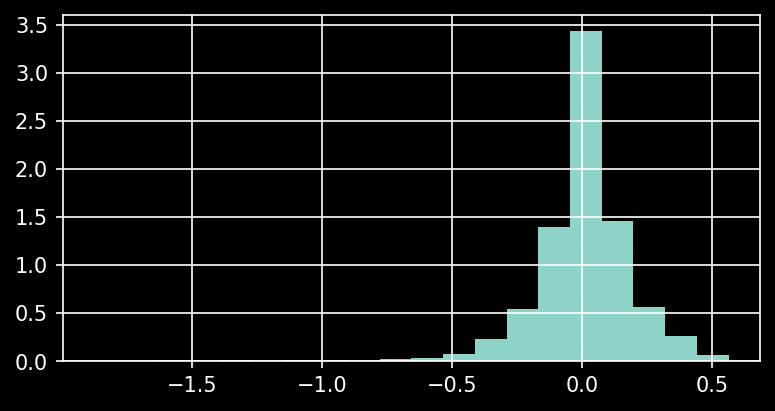

In [10]:
import matplotlib.pyplot as plt
# fig,ax = subplots(1)
# Plot the histogram of measurement errors
# ax.hist(residual_ir4_polynomial, bins=10, edgecolor='black')
# ax.set_title('Measurement Errors Histogram')
# # ax[.set_xlabel(r"Measurement Error")
# # ax[1].set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

plt.figure(figsize=(6, 3), dpi=150)
plt.hist(residual_ir4_polynomial, bins=20, density=True)
plt.grid()


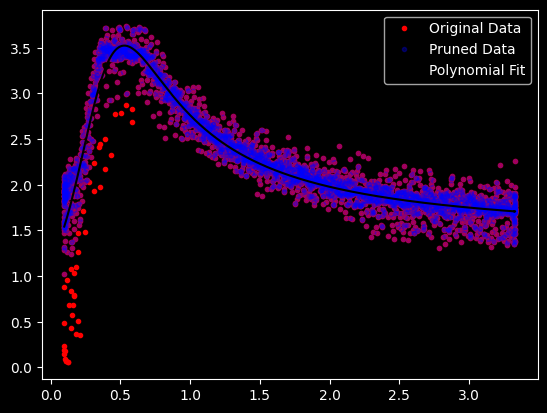

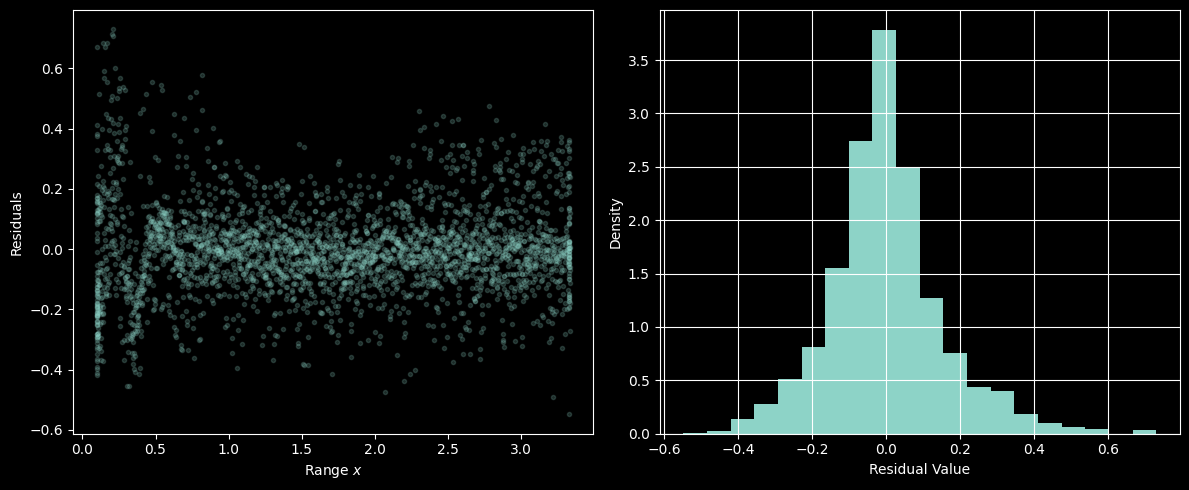

In [11]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt  # Import the necessary module



# Fit the polynomial model to the data
ir4_polynomial_params, cov = sp.optimize.curve_fit(ir4_polynomial_model, distance, raw_ir4)
ir4_polynomial_fit = ir4_polynomial_model(distance, *ir4_polynomial_params)


### ********************************* Outliers ********************************************
# Calculate the residuals
residual_ir4_polynomial = raw_ir4 - ir4_polynomial_fit
mask = abs(residual_ir4_polynomial) < np.std(residual_ir4_polynomial) * 3
pruned_ir4 = raw_ir4[mask]
pruned_x = distance[mask]

# Create a figure and plot the original data and the polynomial fit
fig, ax = plt.subplots(1)
ax.plot(distance, raw_ir4, '.', alpha=1,color = 'red', label='Original Data')
ax.plot(pruned_x,pruned_ir4,'.',color = 'blue', alpha=0.3, label='Pruned Data')
ax.plot(distance, ir4_polynomial_fit, color = 'black', label='Polynomial Fit')
ax.legend()  # Add a legend


### ********************************* remove Outliers ********************************************
ir4_pruned_params, cov = sp.optimize.curve_fit(ir4_polynomial_model, pruned_x, pruned_ir4)
ir4_pruned_fit = ir4_polynomial_model(pruned_x, *ir4_pruned_params)
residual_without_Outlier_ir1 = ir4_pruned_fit - pruned_ir4

# *********************** .  ***********************
# Create subplots for residual analysis
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Specify figsize

# Plot the residuals
ax[0].plot(pruned_x, residual_without_Outlier_ir1, '.', alpha=0.2)
ax[0].set_xlabel(r"Range $x$")
ax[0].set_ylabel(r"Residuals")

# Create a histogram of the residuals
ax[1].hist(residual_without_Outlier_ir1, bins=20, density=True)
ax[1].set_xlabel("Residual Value")
ax[1].set_ylabel("Density")
ax[1].grid()

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plots
